In [78]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt
import math

### A tutorial on formulate likelihood function to estimate parameters for given probability distributions

#### Let's continue with the bias coin example by sampling some data from a Binomial distribution with known parameters (n = 10, p = 0.7).

binom.rvs(n, p, loc=0, size=1, random_state=None)

In [91]:
data_binom = binom.rvs(n = 10, p = 0.7, loc=0, size=100, random_state=0)

data_binom

array([ 7,  6,  7,  7,  7,  7,  7,  5,  4,  7,  6,  7,  7,  5,  9,  9, 10,
        6,  6,  5,  4,  6,  7,  6,  9,  7,  9,  5,  7,  7,  8,  6,  7,  7,
       10,  7,  7,  7,  5,  6,  8,  7,  6,  9,  6,  6,  8,  9,  8,  8,  7,
        7,  4,  9,  8,  8,  6,  8,  7,  8,  8,  9,  6,  9,  8,  8,  6,  9,
        6,  9,  4,  7,  4,  7,  6,  9,  8,  9,  8,  9,  8,  7,  9,  6,  7,
        8,  7,  9,  7,  5,  8,  6,  9,  6,  8,  8,  7, 10,  6, 10])

#### Define a function to calculate logorithm likelihood for Binomial distribution, where $p$ is the success rate to be determined (it is a scalar value), $n$ is the number of tosses (in our case, it is a constant $n=10$), and $y$ is the result of the experiments.

Here we use the scipy.stats.binom's _logpmf_ function to calculate the logarithm of binomial pmf. 

In [92]:
def log_likelihood_binomdist_N(p, n, y):
    return binom.logpmf(k=y, n = n, p = p).sum()

Let's test the log likelihood function with $n = 10$, data (_data_binom_) and an arbitrary success rate (e.g. $p = 0.1$).

In [93]:
L_Binom = log_likelihood_binomdist_N(n=10, p = 0.1, y = data_binom)

L_Binom

-1265.805704965012

We can also test the log likelihood function with a range of success rate values. This would allow is to see the change of the log likelihood and find the $p$ that leads to the maximum (log) likelihood.

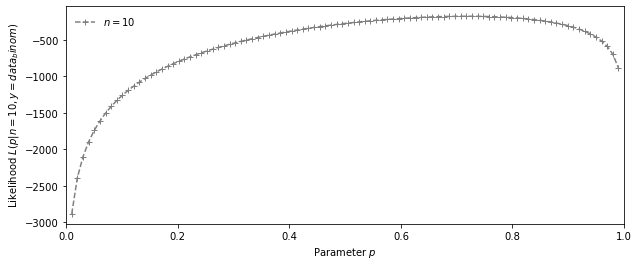

In [94]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)

w = np.linspace(0,1,100)

L_Binoms = []
for p in w:
    L_Binoms.append(log_likelihood_binomdist_N(p,n = 10,y = data_binom))

ax.plot(w,L_Binoms, color='grey', label='$n=10$', marker='+', linestyle='dashed')
ax.set_xlabel('Parameter $p$')
ax.set_ylabel('Likelihood $L(p|n=10, y = data_binom)$')
ax.set_xlim([0, 1])
#ax.set_ylim([0.0, 0.4])
ax.legend(frameon=False)

plt.show()

#### However, we cannot rely on _visual inspection_ all the time to derive our parameter. Instead, we may employ a numerical solver (minimiser) to help us identify the parameter.

To do this, let's import the _minimize_ function in the scipy.optimize module. This function incorporate a range of minimization algorithms into a single function, and you can specify the one you would like to use.

See: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [95]:
from scipy.optimize import minimize

We need to slighly modify our likelihood function because the numerical solver is to minimize (instead of maximize). A _negative_ sign is added to our returned likelihood value.

In [96]:
def negative_log_likelihood_binomdist_N(p, n, y):
    return -binom.logpmf(k=y, n = n, p = p).sum()

Here, we use _Nelder-Mead_ algorithm. 

The inerface of the minimize function is as follow:

scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)

where _fun_ is the target function, _x0_ is the initial guess of the parameters to be solved, _args_ are the rest of the parameters, and you can specifiy the algorithm you would like to use with _method_. 

In our case, _fun_ is the negative_log_likelihood_binomdist_N function, _x0_ can be arbitrarily assigned as initial guess for $p$, _args_ are $n = 10$ and data_binom. 


In [97]:
# Perform mle fitting
result = minimize(negative_log_likelihood_binomdist_N, x0=0.1, args=(10, data_binom), method='Nelder-Mead')

result

 final_simplex: (array([[0.71796875],
       [0.71804688]]), array([177.67027959, 177.67028261]))
           fun: 177.67027959218765
       message: 'Optimization terminated successfully.'
          nfev: 38
           nit: 19
        status: 0
       success: True
             x: array([0.71796875])

The $p$ can then be derived (=result.x)

In [98]:
print(f'The p parameter we obtain from our samples is {result.x[0]:.4f}')

The p parameter we obtain from our samples is 0.7180
